### CLASSIFICATION
###### Li Merila. Thesis, april 2024.

In [26]:
import pandas as pd
from utils import compute_metrics, test_predictions, print_values
from plots import stats_plot, distr_plot

### FIRST CLASSIFIER / XLM-ROBERTA:

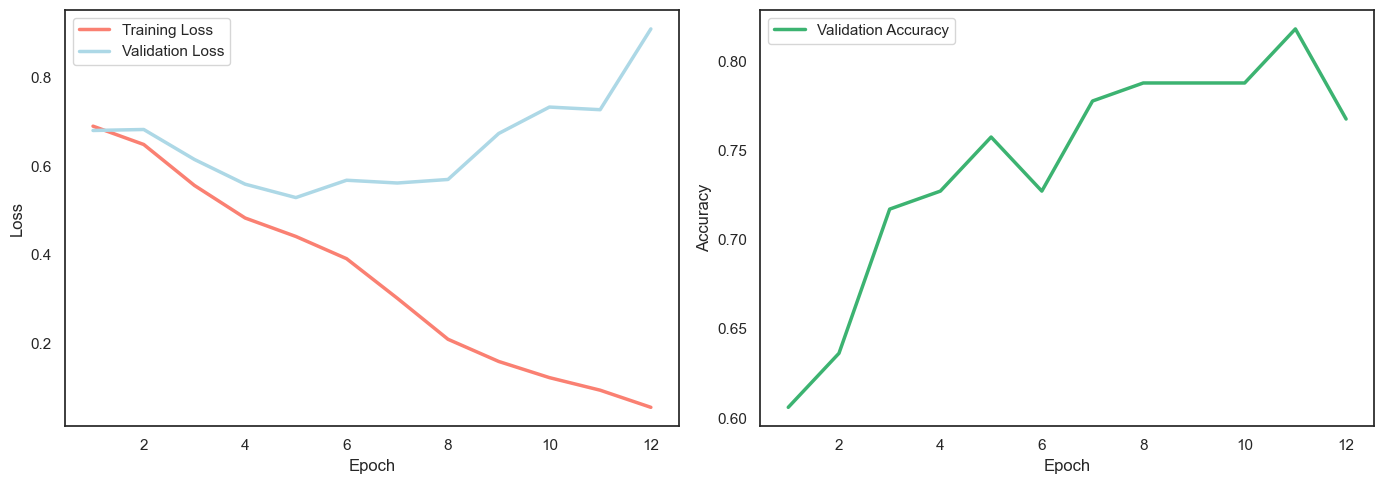

In [27]:
cls1stats = pd.read_parquet('data/cls1-XLM-RoBERTa-epoch-stats.parquet')

stats_plot(cls1stats)

Choice of threshold for confidence sampling:

In [28]:
cls1valpreds = pd.read_parquet('data/cls1-XLM-RoBERTa-val-predictions.parquet')

thresholds = [0.9, 0.99, 0.995, 0.998]

for threshold in thresholds:
    compute_metrics(cls1valpreds, threshold)

# Chosen confidence sampling threshold for predictions
th = 0.995

Threshold 0.9:
Sample Size: 88/99
F1 Score: 0.6538 ± 0.0994
Precision: 0.8095 ± 0.0820
Accuracy: 0.7955 ± 0.0843

Threshold 0.99:
Sample Size: 68/99
F1 Score: 0.7500 ± 0.1029
Precision: 0.8571 ± 0.0832
Accuracy: 0.8824 ± 0.0766

Threshold 0.995:
Sample Size: 57/99
F1 Score: 0.8000 ± 0.1038
Precision: 1.0000 ± 0.0000
Accuracy: 0.9123 ± 0.0734

Threshold 0.998:
Sample Size: 35/99
F1 Score: 0.6667 ± 0.1562
Precision: 1.0000 ± 0.0000
Accuracy: 0.9143 ± 0.0927



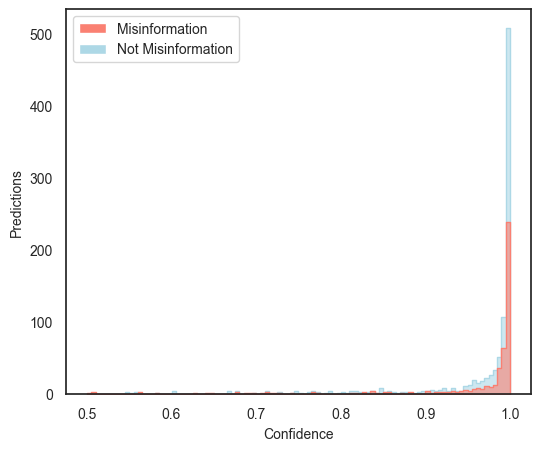

In [29]:
cls1testpreds = pd.read_parquet('data/cls1-XLM-RoBERTa-test-predictions.parquet')

distr_plot(cls1testpreds, ontop=1)

In [30]:
test_predictions(cls1testpreds, th)

Threshold 0.995:
0: 499
1: 223
Adding to the dataset: 722


### SECOND CLASSIFIER / XLM-ROBERTA:

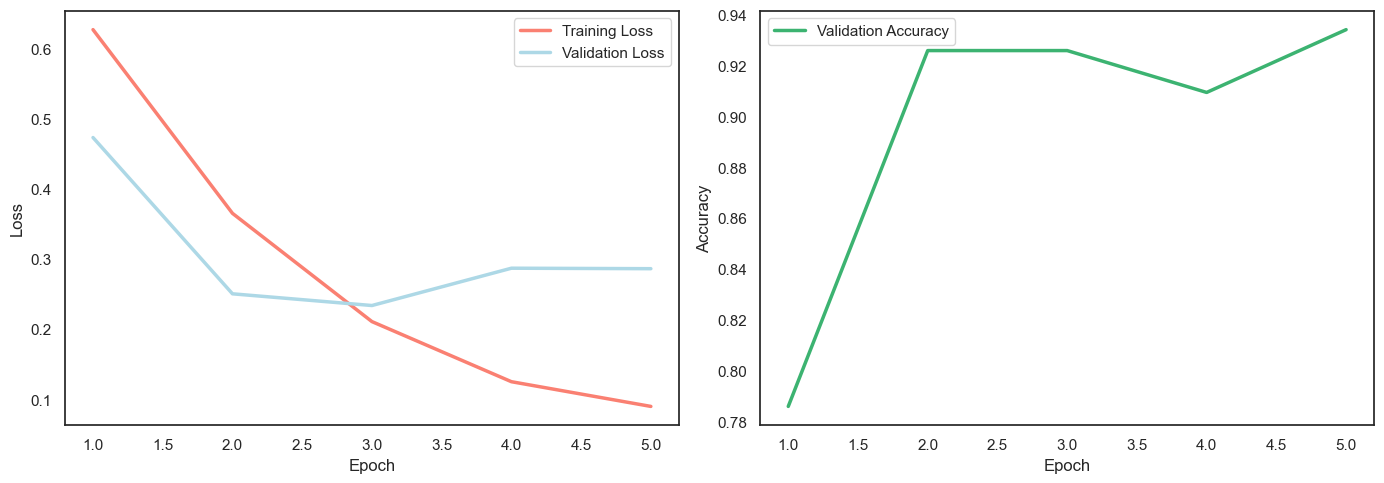

In [31]:
cls2stats = pd.read_parquet('data/cls2-XLM-RoBERTa-epoch-stats.parquet')

stats_plot(cls2stats)

In [32]:
cls2valpreds = pd.read_parquet('data/cls2-XLM-RoBERTa-val-predictions.parquet')

compute_metrics(cls2valpreds, th)

Threshold 0.995:
Sample Size: 165/243
F1 Score: 0.9643 ± 0.0283
Precision: 0.9419 ± 0.0357
Accuracy: 0.9636 ± 0.0286



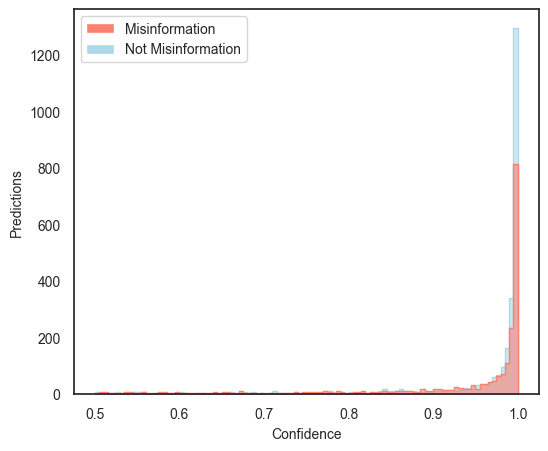

In [33]:
cls2testpreds = pd.read_parquet('data/cls2-XLM-RoBERTa-test-predictions.parquet')

distr_plot(cls2testpreds, ontop=0)

In [34]:
test_predictions(cls2testpreds, th)

Threshold 0.995:
1: 771
0: 1229
Adding to the dataset: 2000


### CLS2 OUTPUT ANNOTATION / RANDOM SAMPLE=300

In [35]:
mannt2 = pd.read_parquet('data/cls2-full-silver-annotation.parquet')

print_values(mannt2, 'Prediction')

0: 140 (46.7%)
1: 88 (29.3%)
2: 72 (24.0%)


Only medicine-related articles:

In [36]:
mannt2_no_nhealth = mannt2[mannt2['Prediction'] != 2]

compute_metrics(mannt2_no_nhealth, 0)

Sample Size: 228/228
F1 Score: 0.8791 ± 0.0423
Precision: 0.9091 ± 0.0373
Accuracy: 0.9035 ± 0.0383



All articles:

In [37]:
mannt3 = pd.read_parquet('data/cls2-out-w-nhealth.parquet')

print_values(mannt3, 'Prediction')

0: 182 (60.7%)
1: 118 (39.3%)


In [38]:
compute_metrics(mannt3, 0)

Sample Size: 300/300
F1 Score: 0.7971 ± 0.0455
Precision: 0.9322 ± 0.0284
Accuracy: 0.8133 ± 0.0441



Only non-medicine articles:

In [39]:
mannt3onlyn = pd.read_parquet('data/cls2-out-only-nhealth.parquet')

print_values(mannt3onlyn, 'Prediction')

0: 42 (58.3%)
1: 30 (41.7%)


In [40]:
compute_metrics(mannt3onlyn, 0)

Sample Size: 72/72
F1 Score: 0.6383 ± 0.1110
Precision: 1.0000 ± 0.0000
Accuracy: 0.5278 ± 0.1153



### FINAL DATASET:

In [91]:
# gold + cls1 output + cls2 output
output = pd.read_parquet('data/final-dataset.parquet')

In [92]:
print_values(output, 'Label')

1: 1646 (51.2%)
0: 1569 (48.8%)


In [93]:
print_values(output, 'Website')

tervise.geenius.ee: 1034 (32.2%)
uueduudised.ee: 801 (24.9%)
telegram.ee: 788 (24.5%)
objektiiv.ee: 580 (18.0%)
vanglaplaneet.ee: 1 (0.0%)
haigekassa.ee: 1 (0.0%)
forte.delfi.ee: 1 (0.0%)
minuaeg.com: 1 (0.0%)
ravimiamet.ee: 1 (0.0%)
naine.postimees.ee: 1 (0.0%)
pealinn.ee: 1 (0.0%)
itk.ee: 1 (0.0%)
menu.err.ee: 1 (0.0%)
tervis.postimees.ee: 1 (0.0%)
novaator.err.ee: 1 (0.0%)
m.delfi.ee: 1 (0.0%)
